# Score de Risco 

### Criado por João Teles e Rodrigo Sales para discutir os resultados analíticos de como certo modelos de Machine Learning podem se comportar nos dados fonecidos pela empresa Praso.

#### Importação de frameworks para análise preliminar dos dados.

In [1]:

import pandas as pd


##### Primeiras impressões com tipo de dados, checar os valores nulos e aplicar estatística padrão

In [2]:
dados_clientes = pd.read_csv('amostra_praso.csv', sep=',')

# Exibe a quantidade de linhas e colunas do DataFrame
print(dados_clientes.shape)

# Exibe as primeiras linhas do DataFrame
print(dados_clientes.head())


(12458, 20)
   uf    municipio        segmento_cliente                natureza_juridica  \
0  PE       RECIFE  Restaurante Brasileiro  213-5 - Empresário (Individual)   
1  PE   CHA GRANDE          Pizza & Massas  213-5 - Empresário (Individual)   
2  PB  JOAO PESSOA     Doces & Confeitaria  213-5 - Empresário (Individual)   
3  CE     CASCAVEL      Lanches & Salgados  213-5 - Empresário (Individual)   
4  PE       RECIFE     Mercearia & Mercado  213-5 - Empresário (Individual)   

  fonte_cliente cnae_codigo  \
0       Fonte 5  56.11-2-01   
1       Fonte 2  56.11-2-01   
2       Fonte 2  10.93-7-01   
3       Fonte 2  56.20-1-04   
4       Fonte 2  56.11-2-03   

                                      cnae_descricao capital_social  \
0                           Restaurantes e similares  (8000, 10000]   
1                           Restaurantes e similares   (3000, 5000]   
2  Fabricação de produtos derivados do cacau e de...    (200, 1000]   
3  Fornecimento de alimentos preparados pr

In [3]:
# Informações gerais
dados_clientes.info()

# Estatísticas descritivas
dados_clientes.describe()

# Verificando valores nulos
dados_clientes.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                12458 non-null  object 
 1   municipio                         12458 non-null  object 
 2   segmento_cliente                  12458 non-null  object 
 3   natureza_juridica                 12458 non-null  object 
 4   fonte_cliente                     12458 non-null  object 
 5   cnae_codigo                       12458 non-null  object 
 6   cnae_descricao                    12458 non-null  object 
 7   capital_social                    12458 non-null  object 
 8   idade_cnpj                        12458 non-null  object 
 9   serasa_contagem_negativacoes      12458 non-null  int64  
 10  serasa_contagem_protestos         12458 non-null  int64  
 11  serasa_idade_divida_mais_recente  2356 non-null   float64
 12  sera

uf                                      0
municipio                               0
segmento_cliente                        0
natureza_juridica                       0
fonte_cliente                           0
cnae_codigo                             0
cnae_descricao                          0
capital_social                          0
idade_cnpj                              0
serasa_contagem_negativacoes            0
serasa_contagem_protestos               0
serasa_idade_divida_mais_recente    10102
serasa_credores                     10483
serasa_socio_tem_negativacao            0
ifood_contagem_avaliacoes           11978
ifood_faixa_preco                   11604
google_maps_avaliacao               11593
google_maps_contagem_avaliacoes     11420
google_maps_tem_website             11420
inadimplente                            0
dtype: int64

##### Corrigir tipo de dados de capital_social e idade_cnpj para numérico.

In [17]:
# Garantir que a coluna é string antes de substituir caracteres
dados_clientes["capital_social"] = dados_clientes["capital_social"].astype(str).str.replace(r"\D", "", regex=True).astype(float)
dados_clientes["idade_cnpj"] = dados_clientes["idade_cnpj"].astype(str).str.replace(r"\D", "", regex=True).astype(float)

print(dados_clientes.dtypes)  # Verifique os tipos de dados das colunas



uf                                   object
municipio                            object
segmento_cliente                     object
natureza_juridica                    object
fonte_cliente                        object
cnae_codigo                          object
cnae_descricao                       object
capital_social                      float64
idade_cnpj                          float64
serasa_contagem_negativacoes          int64
serasa_contagem_protestos             int64
serasa_idade_divida_mais_recente    float64
serasa_credores                      object
serasa_socio_tem_negativacao          int64
ifood_contagem_avaliacoes            object
ifood_faixa_preco                    object
google_maps_avaliacao                object
google_maps_contagem_avaliacoes      object
google_maps_tem_website             float64
inadimplente                          int64
tem_divida                            int64
tem_ifood_avaliacoes                  int64
dtype: object


##### Como pode-se resolver o problema de dados nulos em diversas colunas?
##### Média/Mediana, caso os valores sejam distribuídos normalmente.
##### Zero, se fizer sentido como um dado ausente real.

In [22]:
dados_clientes["serasa_idade_divida_mais_recente"] = dados_clientes["serasa_idade_divida_mais_recente"].fillna(dados_clientes["serasa_idade_divida_mais_recente"].median())
print(dados_clientes["serasa_idade_divida_mais_recente"])

0         9.0
1         9.0
2         9.0
3         9.0
4        47.0
         ... 
12453     9.0
12454     7.0
12455     9.0
12456     9.0
12457     9.0
Name: serasa_idade_divida_mais_recente, Length: 12458, dtype: float64


##### Para Variáveis Categóricas
##### Podemos preencher valores nulos com "Não Informado".

In [7]:
dados_clientes["ifood_faixa_preco"] = dados_clientes["ifood_faixa_preco"].fillna("Não Informado")
dados_clientes["google_maps_avaliacao"] = dados_clientes["google_maps_avaliacao"].fillna(0)
dados_clientes["google_maps_tem_website"] = dados_clientes["google_maps_tem_website"].fillna(0)


##### Criar Indicadores de Nulos 
##### Criar uma feature binária para indicar ausência de informações.

In [8]:
dados_clientes["tem_divida"] = dados_clientes["serasa_idade_divida_mais_recente"].notnull().astype(int)
dados_clientes["tem_ifood_avaliacoes"] = dados_clientes["ifood_contagem_avaliacoes"].notnull().astype(int)


#### flag se cliente deve (true) ou não deve (false)

In [ ]:
dados_clientes["possui_divida"] = dados_clientes["serasa_idade_divida_mais_recente"].notna().astype(int)

### Feature engineering

##### Agrupar o CNAE como sugerido, ...

In [9]:
dados_clientes["cnae_divisao"] = dados_clientes["cnae_codigo"].astype(str).str[:2]


#### Label Enconding para as variáveis com poucas categorias


#### One Hot Enconding para colunas com muitas categorias

In [21]:
dados_clientes = pd.get_dummies(dados_clientes, columns=["cnae_divisao"], drop_first=True)


### Histograma de vizualização de variaveis

In [15]:
%pip install matplotlib
%pip install seaborn

  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
N

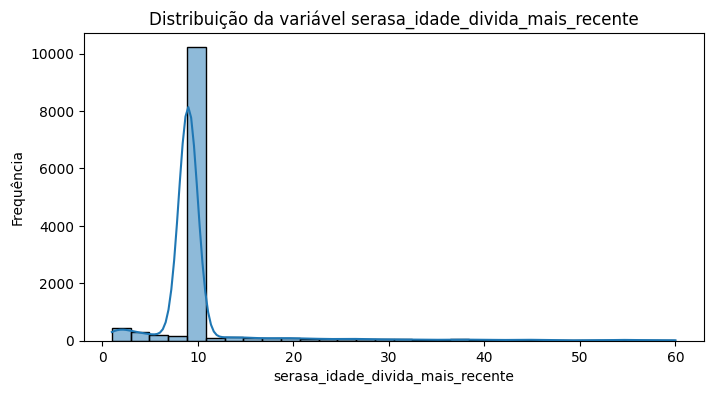

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas para visualizar
variaveis_numericas = ["serasa_idade_divida_mais_recente"]  # Adicione outras aqui

for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(dados_clientes[var], bins=30, kde=True)
    plt.title(f"Distribuição da variável {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()


### Boxplot para detectar outliers

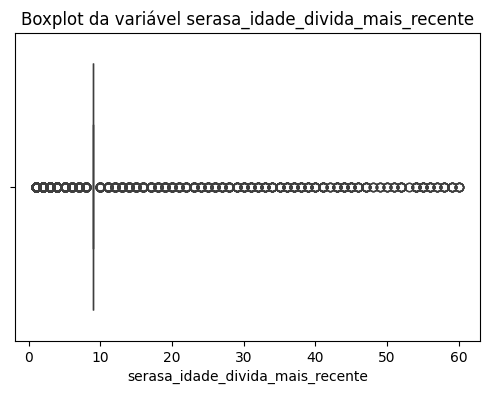

In [17]:
for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dados_clientes[var])
    plt.title(f"Boxplot da variável {var}")
    plt.xlabel(var)
    plt.show()

### Correlação entre variáveis e inadimplência


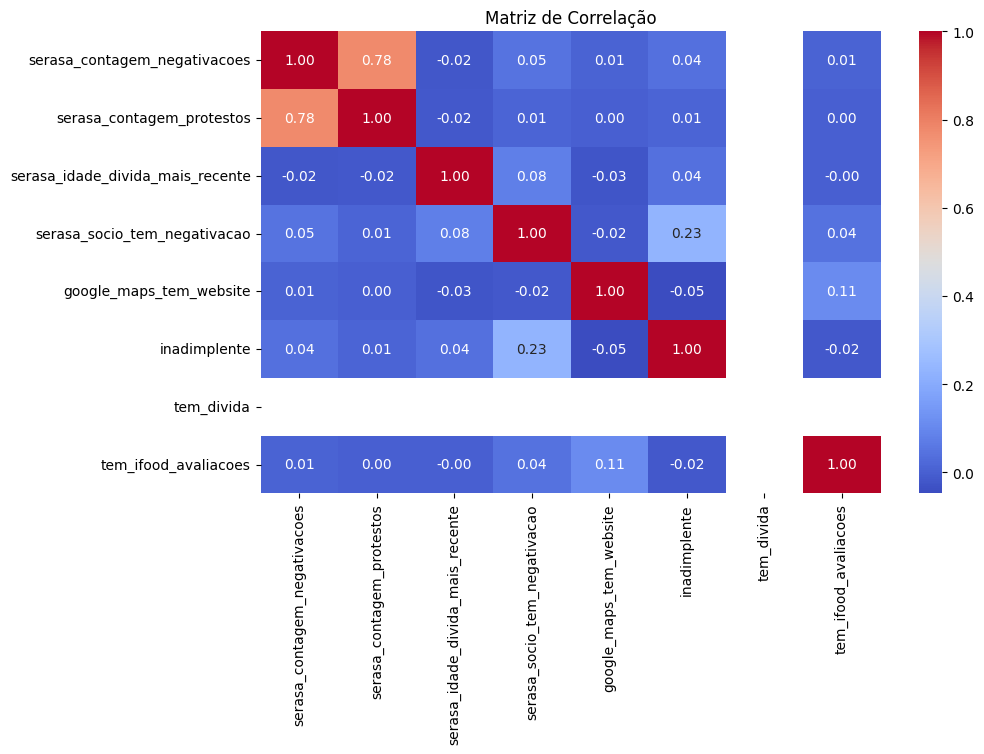

In [19]:
# Selecionar apenas colunas numéricas
dados_numericos = dados_clientes.select_dtypes(include=['float64', 'int64'])

# Criar matriz de correlação
correlacao = dados_numericos.corr()

# Plotar heatmap da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

### Definição de Modelos para Teste

#### Dividir os dados em treino e teste

In [21]:
from sklearn.model_selection import train_test_split

# Definindo X como as features e y como a variável target (inadimplência)
X = dados_clientes.drop(columns=['inadimplente'])
y = dados_clientes['inadimplente']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as dimensões dos conjuntos de treino e teste
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

# Exibir algumas amostras dos conjuntos
print("\n📌 Amostras de X_train:")
print(X_train.head())

print("\n📌 Amostras de y_train:")
print(y_train.head())


Tamanho de X_train: (8720, 22)
Tamanho de X_test: (3738, 22)
Tamanho de y_train: (8720,)
Tamanho de y_test: (3738,)

📌 Amostras de X_train:
      uf                municipio     segmento_cliente  \
8188  PE  JABOATAO DOS GUARARAPES   Lanches & Salgados   
4084  CE                FORTALEZA  Mercearia & Mercado   
5703  CE                FORTALEZA  Doces & Confeitaria   
5339  PB              JOAO PESSOA                  Bar   
181   CE                FORTALEZA  Doces & Confeitaria   

                          natureza_juridica fonte_cliente cnae_codigo  \
8188        213-5 - Empresário (Individual)       Fonte 1  56.11-2-03   
4084        213-5 - Empresário (Individual)       Fonte 2  47.24-5-00   
5703        213-5 - Empresário (Individual)       Fonte 1  56.20-1-04   
5339  206-2 - Sociedade Empresária Limitada       Fonte 4  56.11-2-01   
181         213-5 - Empresário (Individual)       Fonte 3  56.12-1-00   

                                         cnae_descricao    capital_socia

#### Regressão Logística

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Criar e treinar o modelo
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = model_lr.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lr))

ValueError: could not convert string to float: 'PE'

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Criar e treinar o modelo
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = model_rf.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

ValueError: could not convert string to float: 'PE'

#### XGBoost

In [25]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBClassifier

# Criar e treinar o modelo
model_xgb = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb = model_xgb.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:uf: object, municipio: object, segmento_cliente: object, natureza_juridica: object, fonte_cliente: object, cnae_codigo: object, cnae_descricao: object, capital_social: object, idade_cnpj: object, serasa_credores: object, ifood_contagem_avaliacoes: object, ifood_faixa_preco: object, google_maps_avaliacao: object, google_maps_contagem_avaliacoes: object, cnae_divisao: object

#### LightGBM

In [14]:
%pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMClassifier

# Criar e treinar o modelo
model_lgbm = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
model_lgbm.fit(X_train, y_train)

# Fazer previsões
y_pred_lgbm = model_lgbm.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred_lgbm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lgbm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_lgbm))

##